# Import libraries

In [ ]:
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load database and split it into training set and test set

In [ ]:
cifar10 = keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

# Define classes names

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Show a resized image and its corresponding class name

In [ ]:
def resize_img(img, scale):
  width = int(img.shape[1]*scale/100)
  height = int(img.shape[0]*scale/100)
  dim = (width, height)
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
def show_img(i, set_type, scale):
  if (set_type == 'train'):
    resized_50 = resize_img(train_images[i], scale)
    cv2_imshow(resized_50)
    class_name = class_names[train_labels[i][0]]
    print(class_name)
  elif (set_type == 'test'):
    resized_50 = resize_img(test_images[i], scale)
    cv2_imshow(resized_50)
    class_name = class_names[test_labels[i][0]]
    print(class_name)

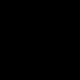

ship


In [ ]:
show_img(777, 'train', 250)

# Build CNN

In [ ]:
cnn = keras.models.Sequential()
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPool2D((2,2)))

cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D((2,2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.Dense(10))

# Compile CNN

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
learning_rate = 0.001
optmizer = keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']

In [ ]:
cnn.compile(optimizer=optmizer, loss=loss, metrics=metrics)

#  Train CNN

In [ ]:
batch_size = 64
epochs = 10
cnn.fit(train_images, train_labels, epochs=epochs, verbose=2)

Epoch 1/10
1563/1563 - 48s - loss: 1.5059 - accuracy: 0.4578 - 48s/epoch - 30ms/step
Epoch 2/10
1563/1563 - 47s - loss: 1.1608 - accuracy: 0.5910 - 47s/epoch - 30ms/step
Epoch 3/10
1563/1563 - 47s - loss: 1.0161 - accuracy: 0.6460 - 47s/epoch - 30ms/step
Epoch 4/10
1563/1563 - 47s - loss: 0.9357 - accuracy: 0.6748 - 47s/epoch - 30ms/step
Epoch 5/10
1563/1563 - 47s - loss: 0.8765 - accuracy: 0.6950 - 47s/epoch - 30ms/step
Epoch 6/10
1563/1563 - 47s - loss: 0.8322 - accuracy: 0.7083 - 47s/epoch - 30ms/step
Epoch 7/10
1563/1563 - 47s - loss: 0.7911 - accuracy: 0.7229 - 47s/epoch - 30ms/step
Epoch 8/10
1563/1563 - 47s - loss: 0.7584 - accuracy: 0.7347 - 47s/epoch - 30ms/step
Epoch 9/10
1563/1563 - 48s - loss: 0.7267 - accuracy: 0.7455 - 48s/epoch - 30ms/step
Epoch 10/10
1563/1563 - 48s - loss: 0.6990 - accuracy: 0.7531 - 48s/epoch - 31ms/step


# Testing the CNN

In [135]:
test_index = 467

In [136]:
test_image = np.expand_dims(test_images[test_index], axis=0)
result = cnn.predict(test_image)
index = np.where(result[0] == np.max(result[0]))
print(class_names[index[0][0]])

cat


In [112]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

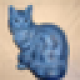

cat


In [137]:
show_img(test_index, 'test', 250)